In [1]:
import os
import pandas as pd
os.chdir('../scripts/')
import utils as util
import text_anlaysis_utils as text_util
import plot

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/musse/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/musse/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
os.chdir('../scripts/')
all_data_path = '../data/sentiment _analysis/raw_analyst_ratings.csv'
# Read the CSV file from the specified path and store it in the dataframe 'df'
df = util.read_csv_file(all_data_path)

In [3]:
df = df.get("data")
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


EDA

In [4]:
df.shape

(1407328, 5)

In [5]:
df['stock'].unique()

array(['A', 'AA', 'AAC', ..., 'ZU', 'ZUMZ', 'ZX'],
      shape=(6204,), dtype=object)

In [6]:
df['publisher'].unique

<bound method Series.unique of 0          Benzinga Insights
1          Benzinga Insights
2                 Lisa Levin
3                 Lisa Levin
4                 Vick Meyer
                 ...        
1407323        Monica Gerson
1407324         Benjamin Lee
1407325       BenzingaStaffL
1407326            Joe Young
1407327        Allie Wickman
Name: publisher, Length: 1407328, dtype: object>

Checking for null values

In [7]:
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [8]:
df['sentiment'] = df['headline'].apply(text_util.get_sentiment)

In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [10]:
df.head()

,headline,url,publisher,date,stock,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,positive


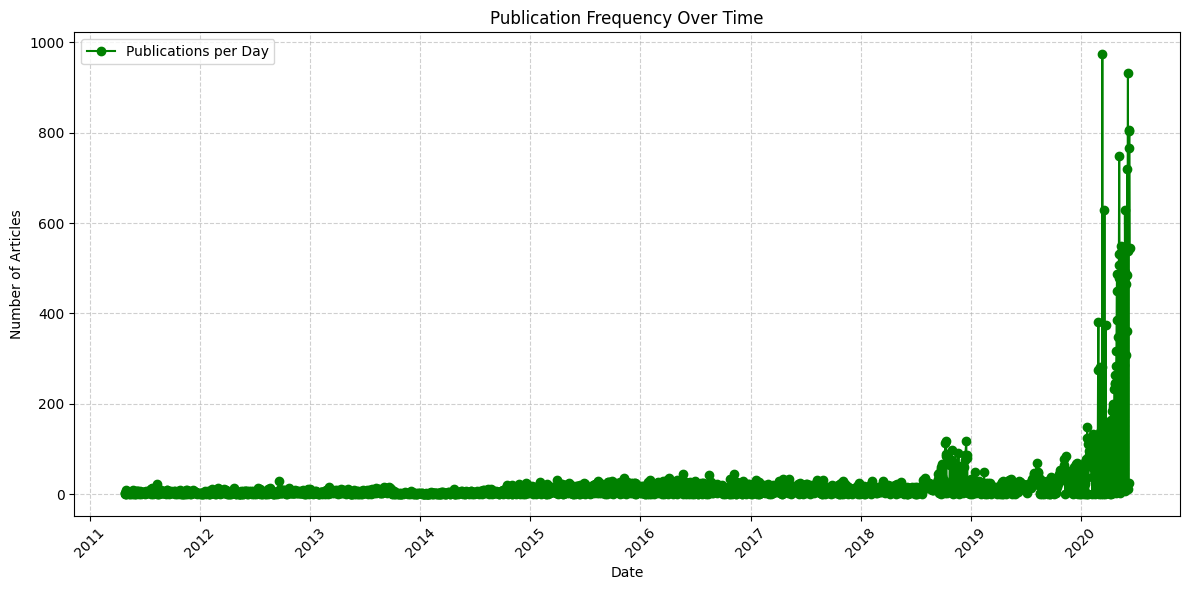

In [11]:
plot.plot_publication_frequency(df)

Top 10 Most Active Publishers:
--------------------------------------------------
Paul Quintaro: 228373 articles (16.23%)
Lisa Levin: 186979 articles (13.29%)
Benzinga Newsdesk: 150484 articles (10.69%)
Charles Gross: 96732 articles (6.87%)
Monica Gerson: 82380 articles (5.85%)
Eddie Staley: 57254 articles (4.07%)
Hal Lindon: 49047 articles (3.49%)
ETF Professor: 28489 articles (2.02%)
Juan Lopez: 28438 articles (2.02%)
Benzinga Staff: 28114 articles (2.00%)

Publisher Statistics:
--------------------------------------------------
Total number of unique publishers: 1034
Average articles per publisher: 1361.05
Median articles per publisher: 11.00


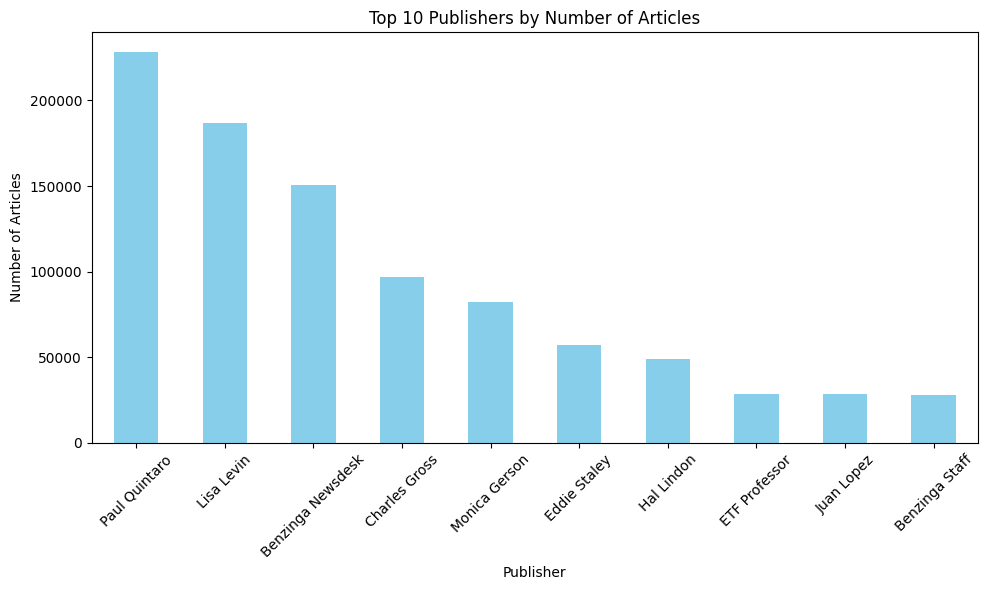

In [12]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the top publishers with more detailed statistics
print("Top 10 Most Active Publishers:")
print("-" * 50)
for publisher, count in publisher_counts.head(10).items():
    percentage = (count / len(df)) * 100
    print(f"{publisher}: {count} articles ({percentage:.2f}%)")

# Display summary statistics
print("\nPublisher Statistics:")
print("-" * 50)
print(f"Total number of unique publishers: {len(publisher_counts)}")
print(f"Average articles per publisher: {publisher_counts.mean():.2f}")
print(f"Median articles per publisher: {publisher_counts.median():.2f}")

# Create visualization
plot.plot_top_publishers(publisher_counts)

Sentiment distribution of Top 10 publishers

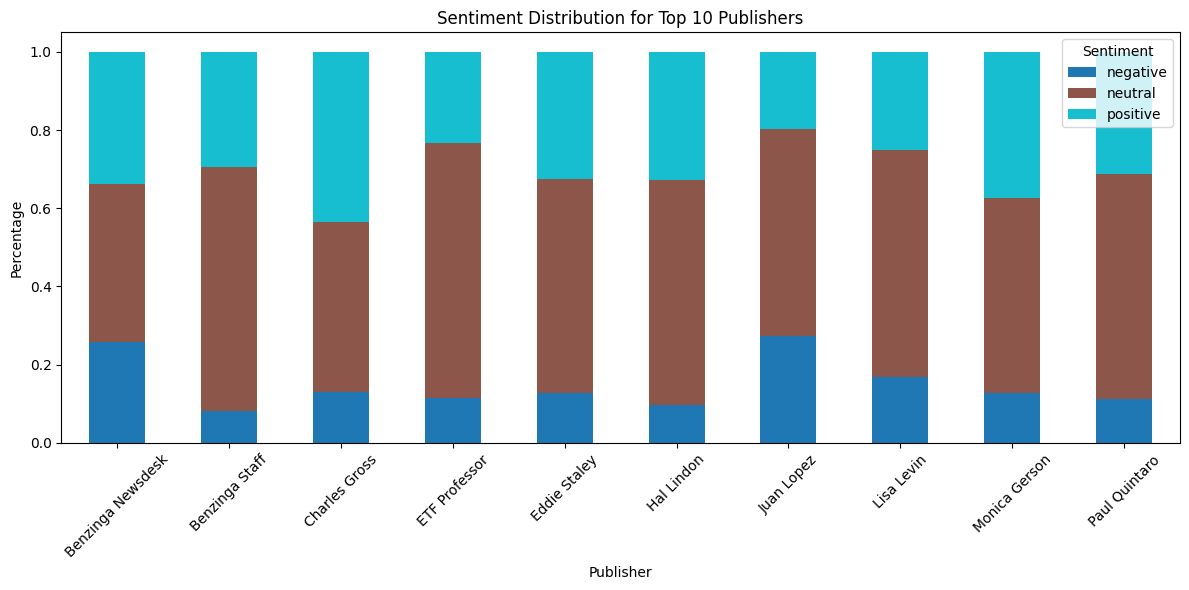

In [13]:
plot.plot_sentiment_by_publisher(df, publisher_column='publisher', sentiment_column='sentiment', top_n=10)

Distribution of headline length


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


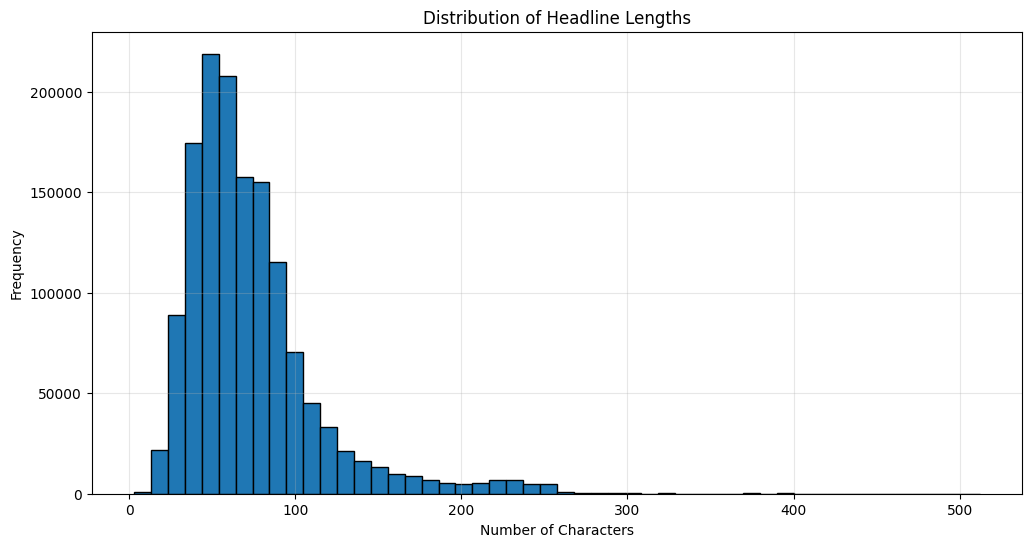

In [14]:
# Calculate headline length statistics
df['headline_length'] = df['headline'].str.len()

# Get basic statistics of headline lengths
headline_stats = df['headline_length'].describe()
print("\nHeadline Length Statistics:")
print(headline_stats)

# Create a histogram of headline lengths
plot.plot_headline_length_distribution(df['headline_length'])

Common Keywords and Phrases

Most Common Keywords:
--------------------------------------------------
eps: 127403
from: 120601
reports: 108429
earnings: 80855
top: 78354
sales: 77924
announces: 66513
downgrades: 61862
trading: 60582
raises: 57735
are: 56561
target: 53530
maintains: 52958
est: 49316
down: 48367
new: 47662
buy: 43697
session: 43513
says: 42839
moving: 42203

Most Common Phrases:
--------------------------------------------------

Common Bigrams (2-word phrases):
price target: 46871
vs est: 46261
eps vs: 43103
are trading: 40496
stocks moving: 39966
in session: 39754
moving in: 39743
shares of: 34833
scheduled for: 32252
earnings scheduled: 32054
coverage on: 30548
in the: 29763
of vs: 28984
initiates coverage: 28980
target to: 28812
sales vs: 28457
from to: 27409
raises pt: 27376
stocks that: 25756
q1 eps: 24532

Common Trigrams (3-word phrases):
stocks moving in: 39609
moving in session: 39527
earnings scheduled for: 32043
initiates coverage on: 28544
price target to: 27139
shares of several: 24060

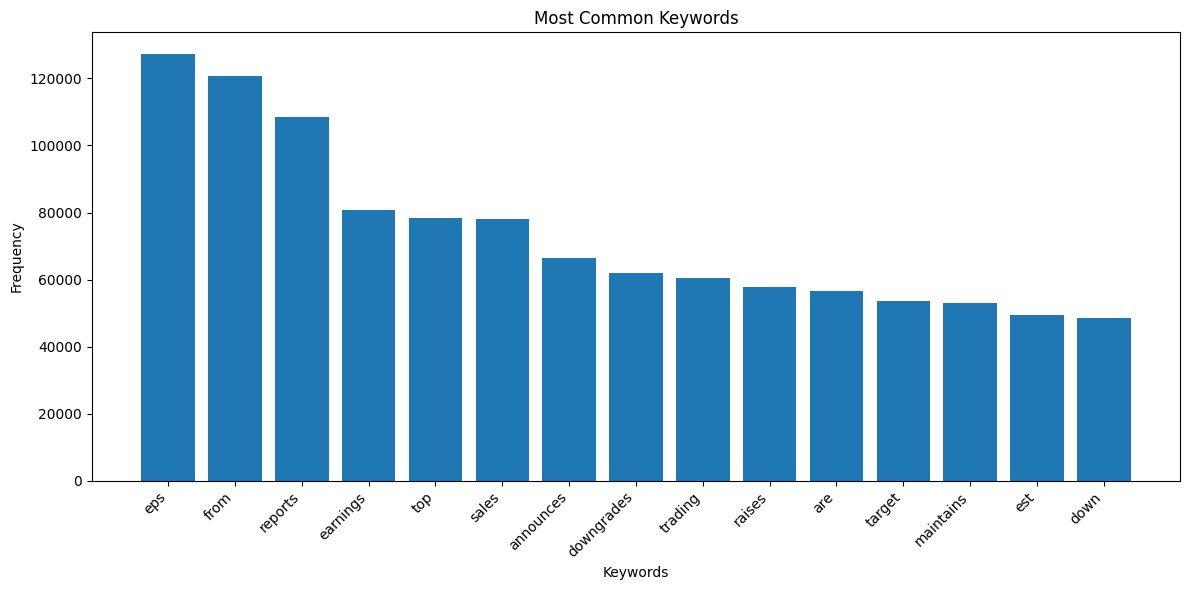

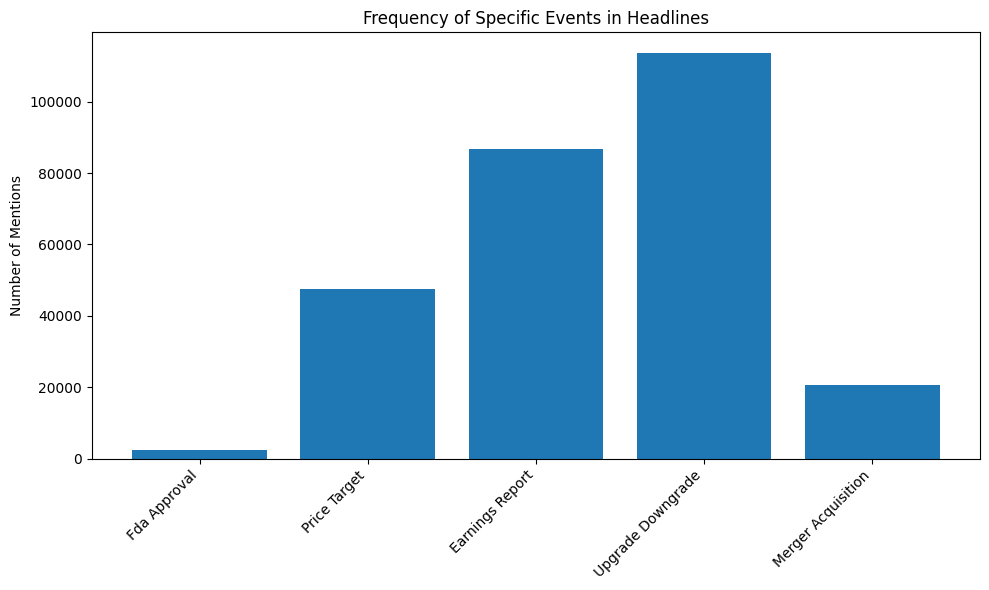

In [15]:
# Extract and analyze keywords
keywords = text_util.extract_keywords(df['headline'])
print("Most Common Keywords:")
print("-" * 50)
for word, count in keywords:
    print(f"{word}: {count}")

# Extract and analyze phrases
phrases = text_util.extract_phrases(df['headline'])
print("\nMost Common Phrases:")
print("-" * 50)
print("\nCommon Bigrams (2-word phrases):")
for phrase, count in phrases['bigrams']:
    print(f"{' '.join(phrase)}: {count}")

print("\nCommon Trigrams (3-word phrases):")
for phrase, count in phrases['trigrams']:
    print(f"{' '.join(phrase)}: {count}")

# Analyze specific events
event_counts = text_util.find_specific_events(df['headline'])
print("\nSpecific Event Mentions:")
print("-" * 50)
for event, count in event_counts.items():
    print(f"{event.replace('_', ' ').title()}: {count}")

# Visualize the results
plot.plot_keyword_frequencies(keywords[:15])  # Show top 15 keywords
plot.plot_event_counts(event_counts)